In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/adult.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [9]:
le.fit(data['income'])
y = le.transform(data['income'])

In [10]:
features_columns = [c for c in data.columns if c != 'income']
data[features_columns].head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States


In [11]:
data = data[features_columns]

In [12]:
selectedColumns = data[ ['age', 'education', 'educational-num',  'marital-status', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'] ]

In [13]:
X = pd.get_dummies(selectedColumns)

**Выбор алгоритмов классификаторов**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [16]:
from sklearn.model_selection import GridSearchCV

params = [ {'max_depth': list( range(1, 20)),  'n_estimators': list( range(1, 20))} ]
gs = GridSearchCV( RandomForestClassifier(), param_grid = params, scoring = 'accuracy', return_train_score = False )

In [25]:
gs.fit( X, y )
gs.best_params_

{'max_depth': 15, 'n_estimators': 14}

In [26]:
params = [ {'max_depth': list( range(1, 20) )} ]
gs = GridSearchCV( DecisionTreeClassifier(), param_grid = params, scoring = 'accuracy', return_train_score = False )

In [21]:
gs.fit( X, y )
gs.best_params_

{'max_depth': 9}

In [17]:
models = []
names = ['LogisticRegression','Random Forest','Neural Network','DecisionTreeClassifier','SVM',]

models.append((LogisticRegression(max_iter=1000,n_jobs=-1)))
models.append((RandomForestClassifier(n_estimators=14, max_depth=15,n_jobs=-1)))
models.append((MLPClassifier(activation='logistic', max_iter=1000, nesterovs_momentum=True)))
models.append((DecisionTreeClassifier(max_depth=9)))
models.append((SVC()))

In [18]:
print (models)

[LogisticRegression(max_iter=1000, n_jobs=-1), RandomForestClassifier(max_depth=15, n_estimators=14, n_jobs=-1), MLPClassifier(activation='logistic', max_iter=1000), DecisionTreeClassifier(max_depth=9), SVC()]


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

for i in range(0,len(models)):    
    cv_result = cross_val_score(models[i],X_train,y_train,cv=5,scoring='accuracy').mean()
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_test)
    acc_score = accuracy_score(y_test,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i], acc_score))

----------------------------------------
LogisticRegression: 0.8449464273527605
----------------------------------------
Random Forest: 0.8575718282945471
----------------------------------------
Neural Network: 0.8299324370436089
----------------------------------------
DecisionTreeClassifier: 0.858459018630997
----------------------------------------
SVM: 0.8024977820241589


### Получите значения AUC для различных моделей и их параметров

**Logistic Regression**

Регуляризация - упрощение модели (уменьшает ошибку разброса, тем самым решает проблему переобучения)

In [20]:
#C - Параметр регуляризации. Сила регуляризации обратно пропорциональна C
model_1_lr = LogisticRegression(solver='liblinear' ).fit( X_train, y_train )
predictions_1_lr = model_1_lr.predict_proba(X_test)

In [21]:
model_2_lr = LogisticRegression(penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, y_train )
predictions_2_lr = model_2_lr.predict_proba(X_test)

In [22]:
model_3_lr = LogisticRegression(penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, y_train )
predictions_3_lr = model_3_lr.predict_proba(X_test)

In [23]:
from sklearn.metrics import roc_curve

false_positive_rate_1_lr, true_positive_rate_1_lr, thresholds_1_lr = roc_curve( y_test, predictions_1_lr[:, 1] )
false_positive_rate_2_lr, true_positive_rate_2_lr, thresholds_2_lr = roc_curve( y_test, predictions_2_lr[:, 1] )
false_positive_rate_3_lr, true_positive_rate_3_lr, thresholds_3_lr = roc_curve( y_test, predictions_3_lr[:, 1] )

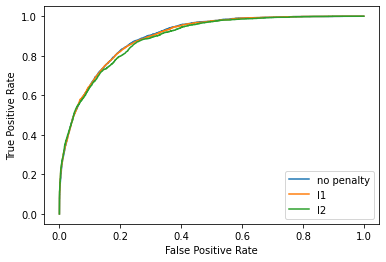

In [24]:
from matplotlib import pyplot as plt

plt.plot( false_positive_rate_1_lr, true_positive_rate_1_lr, label = 'no penalty' )
plt.plot( false_positive_rate_2_lr, true_positive_rate_2_lr, label = 'l1' )
plt.plot( false_positive_rate_3_lr, true_positive_rate_3_lr, label = 'l2' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score

a = roc_auc_score( y_test, predictions_1_lr[:, 1] ).astype(str)
b = roc_auc_score( y_test, predictions_2_lr[:, 1] ).astype(str)
c = roc_auc_score( y_test, predictions_3_lr[:, 1] ).astype(str)

print(a+' '+ b+ ' '+ c)

0.8961852481341172 0.8953169103715418 0.8899072527741978


**Neural Network**

In [26]:
#alpha=0.001 = L2 penalty (regularization term) parameter.
from numpy import mean

alpha = []
cross_val_scores_MLP=[]
predictions_MLP=[]

for i in range(0, 5): 
    MLP = MLPClassifier(alpha = i * 0.25, activation='logistic', max_iter=1000, nesterovs_momentum=True) 
    MLP.fit(X_train, y_train)
    predictions_MLP.append(MLP.predict_proba(X_test))
    scores = cross_val_score(MLP, X, y, cv = 5) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_MLP.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 

In [27]:
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_MLP[i]))

0.0 : 83.63907931698901
0.25 : 83.09652334194253
0.5 : 82.84673605663471
0.75 : 82.6010496439916
1.0 : 82.52119098597757


In [96]:
predictions_MLP[0][:,1]

array([0.01640693, 0.01156501, 0.11270916, ..., 0.12847662, 0.03514546,
       0.04092504])

In [137]:
fpr = [None] * len(alpha)
tpr = [None] * len(alpha)
thres = [None] * len(alpha)


for i in range(len(alpha)):
    fpr[i], tpr[i], thres[i] = (roc_curve( y_test, predictions_MLP[i][:,1] ))

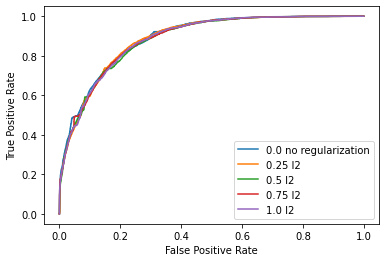

In [143]:
plt.plot( fpr[0], tpr[0], label = '{1} {0}'.format('no regularization', alpha[0]) )
plt.plot( fpr[1], tpr[1], label = '{1} {0}'.format('l2', alpha[1]) )
plt.plot( fpr[2], tpr[2], label = '{1} {0}'.format('l2', alpha[2]) )
plt.plot( fpr[3], tpr[3], label = '{1} {0}'.format('l2', alpha[3]) )
plt.plot( fpr[4], tpr[4], label = '{1} {0}'.format('l2', alpha[4]) )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**SVM**

In [74]:
#penalty = L2 penalty (regularization term) parameter.
#C - Параметр регуляризации. Сила регуляризации обратно пропорциональна C
model_1_svc = SVC(probability=True).fit( X_train, y_train )
predictions_1_svc = model_1_svc.predict_proba(X_test)

In [ ]:
model_2_svc = SVC(penalty = 'l1', C = 0.01, probability=True).fit( X_train, y_train )
predictions_2_svc = model_2_svc.predict_proba(X_test)

In [ ]:
model_3_svc = SVC(penalty = 'l2', C = 0.01, probability=True).fit( X_train, y_train )
predictions_3_svc = model_3_svc.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve

false_positive_rate_1_svc, true_positive_rate_1_svc, thresholds_1_svc = roc_curve( y_test, predictions_1_svc[:, 1] )
false_positive_rate_2_svc, true_positive_rate_2_svc, thresholds_2_svc = roc_curve( y_test, predictions_2_svc[:, 1] )
false_positive_rate_3_svc, true_positive_rate_3_svc, thresholds_3_svc = roc_curve( y_test, predictions_3_svc[:, 1] )

In [ ]:
plt.plot( false_positive_rate_1_svc, true_positive_rate_1_svc, label = 'no penalty' )
plt.plot( false_positive_rate_2_svc, true_positive_rate_2_svc, label = 'l1' )
plt.plot( false_positive_rate_3_svc, true_positive_rate_3_svc, label = 'l2' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

In [ ]:
a = roc_auc_score( y_test, predictions_1_svc[:, 1] ).astype(str)
b = roc_auc_score( y_test, predictions_2_svc[:, 1] ).astype(str)
c = roc_auc_score( y_test, predictions_3_svc[:, 1] ).astype(str)

print(a+' '+ b+ ' '+ c)

**Random Forest Classifier**

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [76]:
model_RFC = RandomForestClassifier(n_estimators=14, max_depth=15, n_jobs=-1).fit( X_train, y_train )
predictions_RFC = model_RFC.predict_proba(X_test)

In [77]:
prediction = model_RFC.predict(X_test)

print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

----------------------------------------
Accuracy score:
0.8577765645260357
----------------------------------------
Confusion Matrix:
[[10635   477]
 [ 1607  1934]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     11112
           1       0.80      0.55      0.65      3541

    accuracy                           0.86     14653
   macro avg       0.84      0.75      0.78     14653
weighted avg       0.85      0.86      0.85     14653

